In [1]:
!pip install -r /kaggle/input/bert-crfnew/bertcrfnbnew/requirements.txt -q

In [2]:
import torch.cuda
import sys
sys.path.insert(0, '/kaggle/input/bert-crfnew/bertcrfnbnew')
from re_utils.train import train_ner

In [3]:
num_labels = 63
train_tokenized_texts_path = "/kaggle/input/bert-crfnew/bertcrfnbnew/resources/data/train/train_processed_10.jsonl"
test_tokenized_texts_path = "/kaggle/input/bert-crfnew/bertcrfnbnew/resources/data/test/test_processed.jsonl"
dropout = 0.2
batch_size = 32
epochs = 3
log_every = 100
lr_new_layers = 1e-3
lr_bert = 1e-5
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


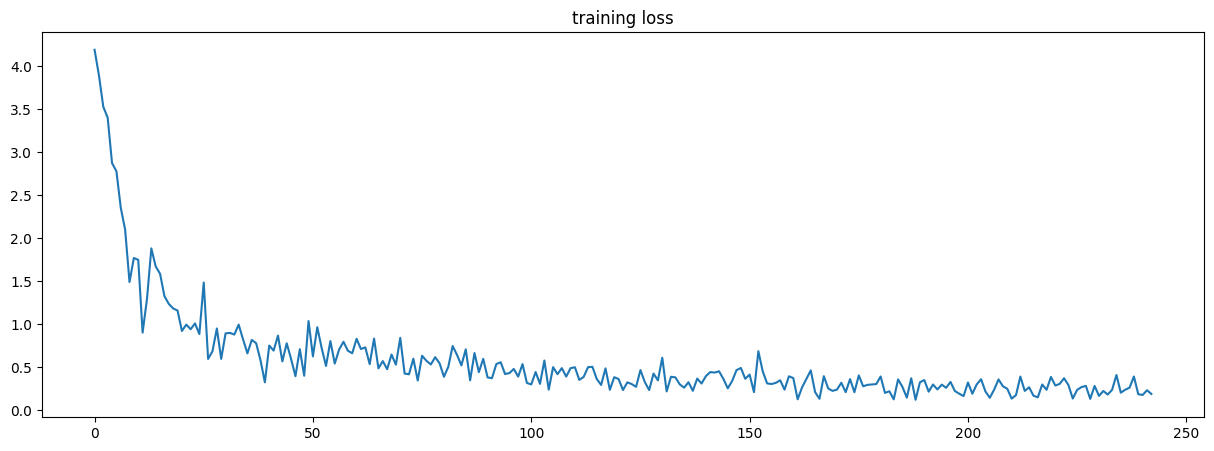

Current loss: 0.1868778020143509
f1_micro: [0.8449602569923939, 0.8752736926982424, 0.8857439028134397]
f1_macro: [0.16763484005916496, 0.28367206526445304, 0.36318148494866787]
mcc: [0.6470310446818692, 0.7253900763132582, 0.7520932752717692]


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.91      0.10      0.18      1089
           1       0.48      0.62      0.54     10157
           2       0.08      0.01      0.02      1530
           3       0.00      0.00      0.00       585
           4       0.92      0.93      0.92     22921
           5       0.72      0.32      0.45       897
           6       0.59      0.01      0.01      1625
           7       0.54      0.29      0.37      1268
           8       0.00      0.00      0.00      1567
           9       0.00      0.00      0.00       961
          10       0.00      0.00      0.00       124
          11       0.52      0.50      0.51      1735
          12       0.75      0.56      0.64      4702
          13       0.39      0.65      0.48     19979
          14       0.80      0.52      0.63      1387
          15       0.27      0.17      0.21      3741
          16       0.82      0.35      0.49      5102
          17       0.00    

In [4]:
# bert-base-cased w/o crf

train_ner(
    num_labels=num_labels,
    bert_name="bert-base-cased",
    train_tokenized_texts_path=train_tokenized_texts_path,
    test_tokenized_texts_path=test_tokenized_texts_path,
    dropout=dropout,
    batch_size=batch_size,
    epochs=epochs,
    log_every=log_every,
    lr_new_layers=lr_new_layers,
    lr_bert=lr_bert,
    use_crf=False,
    save_to=None,
    device=device
)

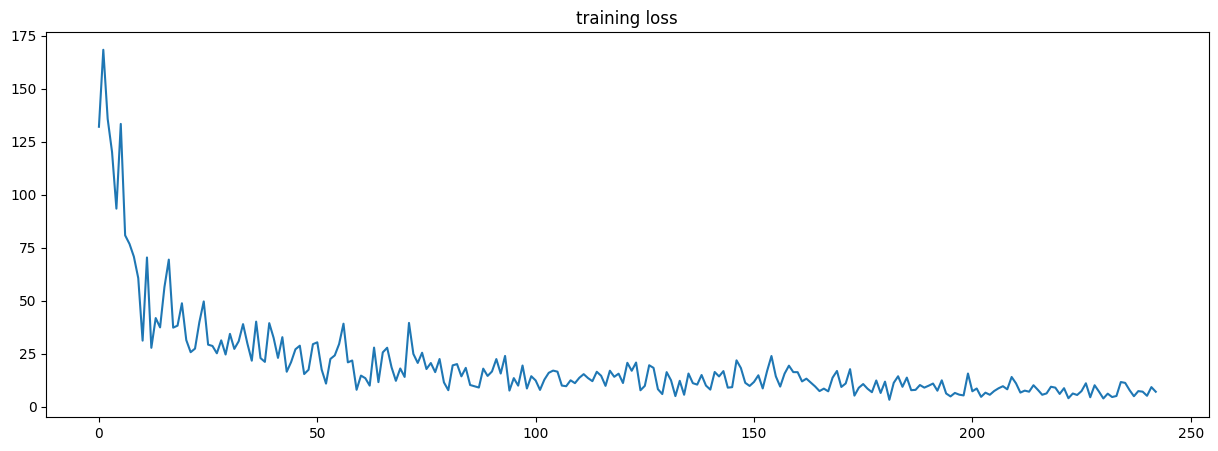

Current loss: 7.103877067565918
f1_micro: [0.8409205123688901, 0.876729616660553, 0.8918980497728856]
f1_macro: [0.15491244103072124, 0.29331210198411267, 0.3846394378814029]
mcc: [0.6339238752287816, 0.7267617086720293, 0.7644707761558729]


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.98      0.17      0.28      1089
           1       0.57      0.53      0.55     10157
           2       0.05      0.00      0.01      1530
           3       0.00      0.00      0.00       585
           4       0.92      0.92      0.92     22921
           5       0.65      0.40      0.49       897
           6       0.85      0.01      0.01      1625
           7       0.82      0.19      0.31      1268
           8       0.39      0.01      0.01      1567
           9       0.00      0.00      0.00       961
          10       0.00      0.00      0.00       124
          11       0.63      0.45      0.53      1735
          12       0.82      0.57      0.67      4702
          13       0.38      0.75      0.50     19979
          14       0.62      0.63      0.62      1387
          15       0.34      0.26      0.30      3741
          16       0.71      0.70      0.71      5102
          17       0.00    

In [5]:
# bert-base-cased + crf

train_ner(
    num_labels=num_labels,
    bert_name="bert-base-cased",
    train_tokenized_texts_path=train_tokenized_texts_path,
    test_tokenized_texts_path=test_tokenized_texts_path,
    dropout=dropout,
    batch_size=batch_size,
    epochs=epochs,
    log_every=log_every,
    lr_new_layers=lr_new_layers,
    lr_bert=lr_bert,
    use_crf=True,
    save_to=None,
    device=device
)